###Question 2###

####part A: explaining about gini impurity####

***intro and question:*** Elucidate the mathematical intuition of the Gini Impurity Index by providing an example. You
should demonstrate your work mathematically and by using codes.

Gini Impurity is one approach to dividing a decision tree. in simple words, *Gini Impurity tells us what is the probability of misclassifying an observation.*

Note that the lower the Gini the better the split. In other words the lower the likelihood of misclassification.

**mathematics**

Suppose we have (n) different classes. Then the Gini formula will be :

In [40]:
from IPython.display import Image

Image(url = "https://miro.medium.com/v2/resize:fit:640/format:webp/1*R715LfIHMHxNMCcMyb7WAA.png",width = 500, height = 250)

#source: https://towardsdatascience.com/gini-impurity-measure-dbd3878ead33

where Pi denotes each classes probability. This is not complete yet. The equation above will give us the gini impurity measure for a sub split, but we would like to know the gini impurity measure for the entire split. Therefore, we will need to weigh them accordingly.

$WeigtedGinx = \Sigma{PsGinx(s)}$

Where s denotes each subsplit of a feature, and Ps is each subsplit's probability.

After calculating this measure for each remaining feature in our dataset, we will divide the current node by the feature having lowest score.

**example**

Suppose we have this dataset:

In [41]:
Image(url = "https://miro.medium.com/v2/resize:fit:640/format:webp/1*JDlJsxwBUFkAqYJBgHjHrw.png",width = 500, height = 250)

#source: https://towardsdatascience.com/gini-impurity-measure-dbd3878ead33

here we only have two classes, so the Gini formula for each subsplit will be:

In [42]:
Image(url = "https://miro.medium.com/v2/resize:fit:536/format:webp/1*z13XNqontu5-igtccnVXhQ.png",width = 500, height = 250)

#source: https://towardsdatascience.com/gini-impurity-measure-dbd3878ead33

therefore we compute the weighted gini score based on emotion or temperature:
\
\
*Emotion*

SickGini = 2 * (2/3) * (1/3) = 0.444

NotSickGini = 2 * (3/5) * (2/5) = 0.48

Weighted Gini Split = (3/8) * SickGini + (5/8) NotSickGini = 0.4665
\
\
*Temperature*

We are going to hard code the threshold of temperature as Temp ≥ 100.

TempOverGini = 2 * (3/4) * (1/4) = 0.375

TempUnderGini = 2 * (3/4) * (1/4) = 0.375

Weighted Gini Split = (4/8) * TempOverGini + (4/8) * TempUnderGini = 0.375

We can see that Temperature has a lower Gini Measure. Therefore we would choose to split on Temperature, because it has the lowest probability of misclassifying the observation.




**code example**

first we define our gini and weighted gini functions:

In [43]:
def Ginx(N1,N2):
    #N1 and N2 are the counts for each class after the split
    denom = N1 + N2
    Ginx = (N1/denom) * (1 - N1/denom) + (N2/denom) * (1 - N2/denom)
    return(Ginx)

def Wght_Ginx(G1,G2,PL,PR):
    # G1 G2 are the gini impurity for each split, and PL PR are the proportion of the split
    WG = PL * G1 + PR * G2
    return(WG)

here we build the exact dataset in our example:

In [44]:
import pandas as pd

# Create Sample
Emotion=['sick','sick','notsick','notsick','notsick','sick','notsick','notsick']
Temperature = ['under','over','under','under','over','over','under','over']
StayHome=['N','Y','Y','N','Y','N','N','Y']
df=pd.DataFrame (list(zip(Emotion,Temperature,StayHome)),
                columns=["Emotion","Temperature","StayHome"])
#sort it by Emotion
df.sort_values(['Emotion'],inplace=True)
print(df)

   Emotion Temperature StayHome
2  notsick       under        Y
3  notsick       under        N
4  notsick        over        Y
6  notsick       under        N
7  notsick        over        Y
0     sick       under        N
1     sick        over        Y
5     sick        over        N


here we calculate the measures for each split:

In [45]:
GiniSick = Ginx(2,1)
print("Sick Gini Impurity:",GiniSick)
GiniNotSick = Ginx(3,2)
print("Not Sick gini impurity:",GiniNotSick)
print("weighted gini impurity for Emothion:", Wght_Ginx(GiniSick,GiniNotSick,(3/8),(5/8)))

print("\n")

Giniover = Ginx(3,1)
print("Sick Gini Impurity:",Giniover)
GiniUnder = Ginx(3,1)
print("Not Sick gini impurity:",GiniUnder)
print("weighted gini impurity for Emothion:", Wght_Ginx(Giniover,GiniUnder,(4/8),(4/8)))

Sick Gini Impurity: 0.4444444444444445
Not Sick gini impurity: 0.48
weighted gini impurity for Emothion: 0.4666666666666667


Sick Gini Impurity: 0.375
Not Sick gini impurity: 0.375
weighted gini impurity for Emothion: 0.375


as you can see we have the exact same answeres as our theory.

<hr>

####part B: comparing trees built with gini and entropy####

***intro and question:*** Using Entropy or the Gini Impurity Index in most decision tree applications leads to similar
results. That is said, the Gini Impurity Index is slightly faster to compute. However, when they
differ, the Gini Impurity Index tends to isolate the most frequent class in its own branch of the
tree, while entropy tends to produce slightly more balanced trees. Provide an example showing
that using entropy tends to produce somewhat more balanced trees than the Gini Impurity Index.

Here we load a target dataset and load decision tree builder from sklearn. we use gini first:

In [46]:
from sklearn import tree
from sklearn.datasets import load_breast_cancer


clf = tree.DecisionTreeClassifier(criterion='gini')
bc = load_breast_cancer()

[Text(0.625, 0.9375, 'x[20] <= 16.795\ngini = 0.468\nsamples = 569\nvalue = [212, 357]'),
 Text(0.40625, 0.8125, 'x[27] <= 0.136\ngini = 0.159\nsamples = 379\nvalue = [33, 346]'),
 Text(0.234375, 0.6875, 'x[12] <= 6.597\ngini = 0.03\nsamples = 333\nvalue = [5, 328]'),
 Text(0.203125, 0.5625, 'x[13] <= 38.605\ngini = 0.024\nsamples = 332\nvalue = [4, 328]'),
 Text(0.125, 0.4375, 'x[14] <= 0.003\ngini = 0.012\nsamples = 319\nvalue = [2, 317]'),
 Text(0.0625, 0.3125, 'x[21] <= 27.755\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.03125, 0.1875, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.09375, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.1875, 0.3125, 'x[21] <= 33.27\ngini = 0.006\nsamples = 312\nvalue = [1, 311]'),
 Text(0.15625, 0.1875, 'gini = 0.0\nsamples = 292\nvalue = [0, 292]'),
 Text(0.21875, 0.1875, 'x[21] <= 33.56\ngini = 0.095\nsamples = 20\nvalue = [1, 19]'),
 Text(0.1875, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.25, 0.0625, 'g

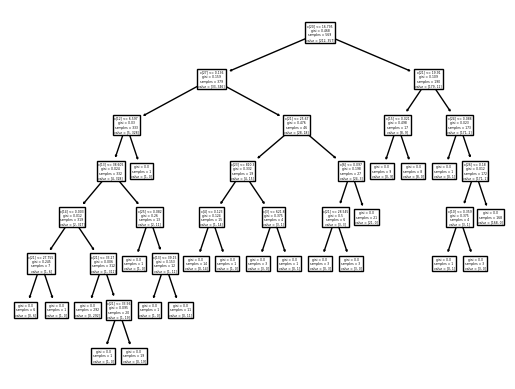

In [47]:
clf = clf.fit(bc.data, bc.target)
tree.plot_tree(clf)

we do the same for entropy:

[Text(0.54, 0.9375, 'x[22] <= 105.95\nentropy = 0.953\nsamples = 569\nvalue = [212, 357]'),
 Text(0.3, 0.8125, 'x[27] <= 0.135\nentropy = 0.283\nsamples = 345\nvalue = [17, 328]'),
 Text(0.16, 0.6875, 'x[13] <= 48.975\nentropy = 0.097\nsamples = 320\nvalue = [4, 316]'),
 Text(0.08, 0.5625, 'x[21] <= 30.145\nentropy = 0.055\nsamples = 316\nvalue = [2, 314]'),
 Text(0.04, 0.4375, 'entropy = 0.0\nsamples = 274\nvalue = [0, 274]'),
 Text(0.12, 0.4375, 'x[20] <= 15.84\nentropy = 0.276\nsamples = 42\nvalue = [2, 40]'),
 Text(0.08, 0.3125, 'x[27] <= 0.092\nentropy = 0.165\nsamples = 41\nvalue = [1, 40]'),
 Text(0.04, 0.1875, 'entropy = 0.0\nsamples = 33\nvalue = [0, 33]'),
 Text(0.12, 0.1875, 'x[15] <= 0.013\nentropy = 0.544\nsamples = 8\nvalue = [1, 7]'),
 Text(0.08, 0.0625, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.16, 0.0625, 'entropy = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.16, 0.3125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.24, 0.5625, 'x[25] <= 0.085\nen

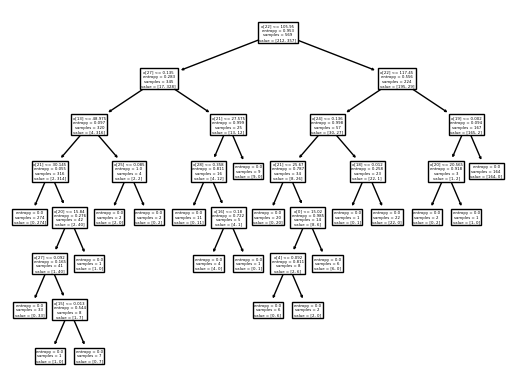

In [48]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

clf = clf.fit(bc.data, bc.target)
tree.plot_tree(clf)

<hr>

####part C####

intro and question: on the provided dataset, build a
Decision Tree and Random Forest Models. Compute the classification report for each model and compare your results.

first we import the needed modules

In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

from google.colab import drive
drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


here we load the data

In [55]:
dataset = pd.read_csv("/content/drive/MyDrive/ai-project-2/q2/Assignment 1-Dataset.csv")
dataset.columns

Index(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11',
       'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20', 'F21',
       'F22', 'F23', 'F24', 'F25', 'F26', 'F27', 'F28', 'F29', 'F30', 'F31',
       'F32', 'F33', 'F34', 'F35', 'F36', 'F37', 'F38', 'F39', 'F40', 'F41',
       'F42', 'F43', 'F44', 'F45', 'F46', 'F47', 'F48', 'F49', 'F50', 'F51',
       'F52', 'F53', 'F54', 'F55', 'F56', 'F57', 'F58', 'F59', 'F60', 'F61',
       'F62', 'F63', 'F64', 'F65', 'F66', 'F67', 'F68', 'F69', 'F70', 'F71',
       'F72', 'F73', 'F74', 'F75', 'F76', 'F77', 'F78', 'F79', 'F80', 'F81',
       'F82', 'F83', 'F84', 'F85', 'F86', 'F87', 'F88', 'F89', 'F90', 'F91',
       'F92', 'Target', 'Unnamed: 93', 'Unnamed: 94'],
      dtype='object')

here we do some preprocess and make our test and train sets.

In [56]:
the_nulls = dataset.isna().any(axis = 0)
df = dataset.drop(dataset.columns[the_nulls == True],axis = 1)
print("do we have null in df?:",df.isna().any(axis = 0).any())

X = df.drop("Target",axis = 1)
y = df.Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

do we have null in df?: False


here we use decision tree to predict the test dataset:

In [57]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

now we show the classification report:

In [58]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70     17061
           1       0.63      0.63      0.63      5422
           2       0.63      0.62      0.62     10909

    accuracy                           0.66     33392
   macro avg       0.65      0.65      0.65     33392
weighted avg       0.66      0.66      0.66     33392



now we use random forest method. first we import the additional needed libraries. RandomizedSearchCV is later used for hyperparameter tuning.

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

here we fit our model without hyperparameter tuning:

In [60]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

now we show the classification report:

In [61]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74     17061
           1       0.68      0.66      0.67      5422
           2       0.69      0.60      0.64     10909

    accuracy                           0.70     33392
   macro avg       0.69      0.68      0.68     33392
weighted avg       0.70      0.70      0.70     33392



now we tune the hyperparameters using RandomizedSearchCV. we want to inspect the number of decision trees in the range of 50 to 500. we also want to set the max depth of trees, as a very deep tree will lead to overfitting and a shallow tree will end up for model not learning. then we will find the best hyperparameters calling the RandomizedSearchCV fucntion, which will iterate for 5 different forests.

In [62]:
param_dist = {'n_estimators': randint(50,500),'max_depth': randint(1,20)}

rf = RandomForestClassifier()

rand_search = RandomizedSearchCV(rf, param_distributions = param_dist,n_iter=5)

after that we will fit our model and print the best hyperparameters

In [63]:
rand_search.fit(X_train, y_train)

print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 18, 'n_estimators': 376}


here we predict the test data using the best model obtained by RandomizedSearchCV.

In [65]:
best_rf = rand_search.best_estimator_

y_pred = best_rf.predict(X_test)

now we show the classification report:

In [66]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.81      0.75     17061
           1       0.69      0.63      0.66      5422
           2       0.72      0.56      0.63     10909

    accuracy                           0.70     33392
   macro avg       0.70      0.67      0.68     33392
weighted avg       0.70      0.70      0.70     33392



<hr>

####part D: regression model using decision trees####

question and intro: explain about the decision tree for a regression model. also Use the Boston housing dataset to build a Decision Tree
and Random Forest Regression model.




suppose we have this dataset and we want to make a decision tree out of it:

In [71]:
Image(url = "https://www.saedsayad.com/images/Decision_tree_r1.png",width = 750, height = 400)

#source: https://www.saedsayad.com/decision_tree_reg.htm

the overall idea in here is to divide our tree into subtrees using standard deviation. for this purpose we will take these steps:

A) computing sd for target. here target is hours played:


In [72]:
Image(url = "https://www.saedsayad.com/images/Decision_tree_r2.png",width = 750, height = 400)

#source: https://www.saedsayad.com/decision_tree_reg.htm

CV is used later to set a threshold to stop the process in leaf nodes.

B) finiding sd based on each feature's subsplits and using them to find the sd of target in respect to that feature. for example for outlook we have:

In [70]:
Image(url = "https://www.saedsayad.com/images/Decision_tree_r3.png",width = 750, height = 400)

#source: https://www.saedsayad.com/decision_tree_reg.htm

C) we choose the feature that reduces sd of target the most. in other words, we will choose the feature with lowest repective sd. here as you can see outlook will be our chosen feature:

In [74]:
Image(url = "https://www.saedsayad.com/images/Decision_tree_r5.png",width = 750, height = 400)

#source: https://www.saedsayad.com/decision_tree_reg.htm

In [73]:
Image(url = "https://www.saedsayad.com/images/Decision_tree_r4.png",width = 750, height = 400)

#source: https://www.saedsayad.com/decision_tree_reg.htm

D) we recursively continue this process for any branch until the value of CV reaches below a specific threshold (i.e. 10 percents) and we consider that branch as a leaf node and halt the process on that branch by replacing avg of target as the leaf node. for instance the overcast branch is a leaf node here:

In [76]:
Image(url = "https://www.saedsayad.com/images/Decision_tree_r7.png",width = 750, height = 400)

#source: https://www.saedsayad.com/decision_tree_reg.htm

In [77]:
Image(url = "https://www.saedsayad.com/images/Decision_tree_r9.png",width = 750, height = 400)

#source: https://www.saedsayad.com/decision_tree_reg.htm

E) we continue this process recursively untill all the branches turn to leaf nodes:

In [78]:
Image(url = "https://www.saedsayad.com/images/Decision_tree_r8.png",width = 750, height = 400)

#source: https://www.saedsayad.com/decision_tree_reg.htm

In [79]:
Image(url = "https://www.saedsayad.com/images/Decision_tree_r12.png",width = 750, height = 400)

#source: https://www.saedsayad.com/decision_tree_reg.htm

<hr>

***Boston housing model***

first we import the needed modules. the boston housing dataset seems to have an ethical issue, therefore it was removed from sklearn. we will import it from it's original source instead:

In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor

#uncomment if you want to see by yourself:

# from sklearn.datasets import load_boston

here we import the dataset manually:

In [101]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = pd.DataFrame(np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]]))
target = pd.DataFrame(raw_df.values[1::2, 2])
data.shape

here we fit the regressor tree to our dataset:

In [116]:
regressor = DecisionTreeRegressor(random_state = 0)
fit_hist = regressor.fit(data, target)

we make a random new point and see the prediction:

In [126]:
new_y = data.loc[0] * 1.2

print(regressor.predict([new_y]))
print(target.loc[0])

[50.]
0    24.0
Name: 0, dtype: float64


Refrences:

(1) Gini Impurity Measure – a simple explanation using python: https://towardsdatascience.com/gini-impurity-measure-dbd3878ead33

(2) https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html

(3) Decision Tree Classification in Python Tutorial: https://www.datacamp.com/tutorial/decision-tree-classification-python

(4) Random Forest Classification with Scikit-Learn: https://www.datacamp.com/tutorial/random-forests-classifier-python

(5) Decision Tree - Regression: https://www.saedsayad.com/decision_tree_reg.htm

(6) Python | Decision Tree Regression using sklearn: https://www.geeksforgeeks.org/python-decision-tree-regression-using-sklearn/